# Understanding Descriptive Statistics

Import the necessary libraries here:

In [2]:
import pandas as pd
import numpy as np

## Challenge 1
#### 1.- Define a function that simulates rolling a dice 10 times. Save the information in a dataframe.
**Hint**: you can use the *choices* function from module *random* to help you with the simulation.

In [3]:
import random

def simulate_dice_rolls(num_rolls=10, sides=6):
    dice_rolls = random.choices(range(1, sides + 1), k=num_rolls)
    df = pd.DataFrame({'Roll': range(1, num_rolls + 1), 'Result': dice_rolls})
    return df

# Simulate rolling the dice 10 times and save the results in a DataFrame
df_dice_rolls = simulate_dice_rolls(num_rolls=10, sides=6)

print(df_dice_rolls)





   Roll  Result
0     1       6
1     2       6
2     3       5
3     4       5
4     5       5
5     6       2
6     7       6
7     8       2
8     9       5
9    10       6


#### 2.- Plot the results sorted by value.

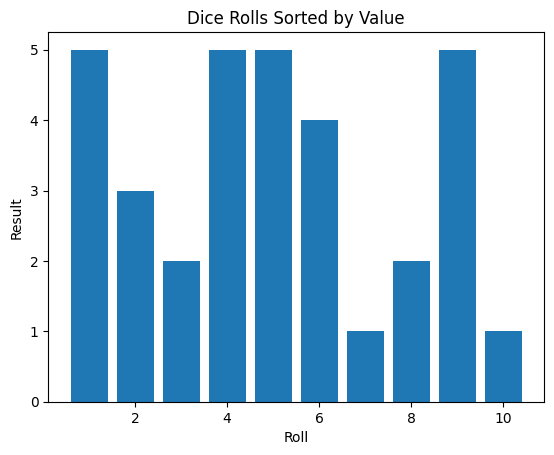

In [4]:
import matplotlib.pyplot as plt

def simulate_dice_rolls(num_rolls=10, sides=6):
    dice_rolls = random.choices(range(1, sides + 1), k=num_rolls)
    df = pd.DataFrame({'Roll': range(1, num_rolls + 1), 'Result': dice_rolls})
    return df

# Simulate rolling the dice 10 times and save the results in a DataFrame
df_dice_rolls = simulate_dice_rolls(num_rolls=10, sides=6)

# Sort the DataFrame by the 'Result' column in ascending order
df_dice_rolls_sorted = df_dice_rolls.sort_values(by='Result')

# Plot the results in a bar plot
plt.bar(df_dice_rolls_sorted['Roll'], df_dice_rolls_sorted['Result'])
plt.xlabel('Roll')
plt.ylabel('Result')
plt.title('Dice Rolls Sorted by Value')
plt.show()


#### 3.- Calculate the frequency distribution and plot it. What is the relation between this plot and the plot above? Describe it with words.

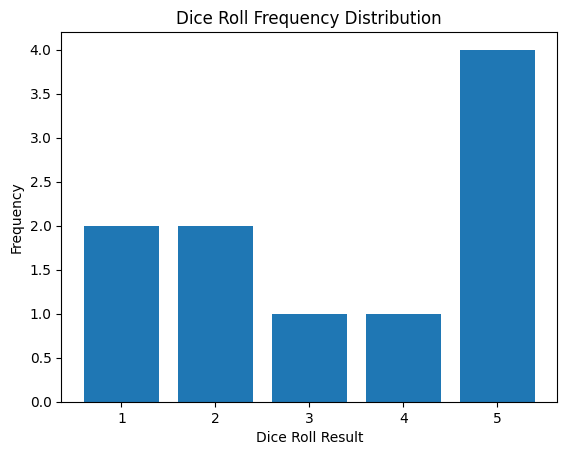

In [5]:
# Calculate the frequency distribution of dice roll results
frequency_distribution = df_dice_rolls['Result'].value_counts().sort_index()

# Plot the frequency distribution in a bar plot
plt.bar(frequency_distribution.index, frequency_distribution.values)
plt.xlabel('Dice Roll Result')
plt.ylabel('Frequency')
plt.title('Dice Roll Frequency Distribution')
plt.show()


In [6]:
"this result focus on the fact that the number 3 might appear more frequently but still has to be prooved on a larger number of roll dice"

'this result focus on the fact that the number 3 might appear more frequently but still has to be prooved on a larger number of roll dice'

## Challenge 2
Now, using the dice results obtained in *challenge 1*, your are going to define some functions that will help you calculate the mean of your data in two different ways, the median and the four quartiles. 

#### 1.- Define a function that computes the mean by summing all the observations and dividing by the total number of observations. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [7]:


def simulate_dice_rolls(num_rolls=10, sides=6):
    dice_rolls = random.choices(range(1, sides + 1), k=num_rolls)
    return dice_rolls

# Simulate rolling the dice 10 times and save the results in a list
dice_results = simulate_dice_rolls(num_rolls=10, sides=6)

print("Dice Rolls:", dice_results)

def calculate_mean(data):
    total_sum = 0
    num_observations = len(data)
    
    for observation in data:
        total_sum += observation
        
    return total_sum / num_observations

mean = calculate_mean(dice_results)
print("Mean:", mean)



Dice Rolls: [2, 1, 2, 5, 6, 6, 1, 5, 4, 4]
Mean: 3.6


#### 2.- First, calculate the frequency distribution. Then, calculate the mean using the values of the frequency distribution you've just computed. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [8]:


def simulate_dice_rolls(num_rolls=10, sides=6):
    dice_rolls = random.choices(range(1, sides + 1), k=num_rolls)
    return dice_rolls

# Simulate rolling the dice 10 times and save the results in a list
dice_results = simulate_dice_rolls(num_rolls=10, sides=6)

print("Dice Rolls:", dice_results)

def calculate_frequency_distribution(data):
    freq_dist = {}
    
    for result in data:
        freq_dist[result] = freq_dist.get(result, 0) + 1
    
    return freq_dist

def calculate_mean_from_freq_dist(freq_dist):
    total_sum = 0
    total_observations = 0
    
    for result, frequency in freq_dist.items():
        total_sum += result * frequency
        total_observations += frequency
        
    return total_sum / total_observations

# Calculate the frequency distribution of dice roll results
frequency_distribution = calculate_frequency_distribution(dice_results)

print("Frequency Distribution:", frequency_distribution)

# Calculate the mean using the values of the frequency distribution
mean_from_freq_dist = calculate_mean_from_freq_dist(frequency_distribution)

print("Mean (calculated from frequency distribution):", mean_from_freq_dist)


Dice Rolls: [3, 2, 4, 3, 5, 2, 2, 6, 1, 3]
Frequency Distribution: {3: 3, 2: 3, 4: 1, 5: 1, 6: 1, 1: 1}
Mean (calculated from frequency distribution): 3.1


#### 3.- Define a function to calculate the median. You are not allowed to use any methods or functions that directly calculate the median value. 
**Hint**: you might need to define two computation cases depending on the number of observations used to calculate the median.

In [9]:
#function
def calculate_median(data):
    sorted_data = sorted(data)
    num_observations = len(sorted_data)

    if num_observations % 2 == 0:
        middle_idx_1 = num_observations // 2 - 1
        middle_idx_2 = num_observations // 2
        median = (sorted_data[middle_idx_1] + sorted_data[middle_idx_2]) / 2
    else:
        middle_idx = num_observations // 2
        median = sorted_data[middle_idx]

    return median

# With the 'dice_results' list from previous challenges
median = calculate_median(dice_results)

print("Median:", median)



Median: 3.0


#### 4.- Define a function to calculate the four quartiles. You can use the function you defined above to compute the median but you are not allowed to use any methods or functions that directly calculate the quartiles. 

In [10]:
def calculate_quartiles(data):
    sorted_data = sorted(data)
    num_observations = len(sorted_data)

    # Calculate Q2 (median)
    if num_observations % 2 == 0:
        middle_idx_1 = num_observations // 2 - 1
        middle_idx_2 = num_observations // 2
        Q2 = (sorted_data[middle_idx_1] + sorted_data[middle_idx_2]) / 2
    else:
        middle_idx = num_observations // 2
        Q2 = sorted_data[middle_idx]

    # Calculate Q1 and Q3
    lower_half = sorted_data[:num_observations // 2]
    upper_half = sorted_data[(num_observations + 1) // 2:]

    Q1 = calculate_median(lower_half)
    Q3 = calculate_median(upper_half)

    return Q1, Q2, Q3

# With the 'dice_results' list from previous challenges
Q1, Q2, Q3 = calculate_quartiles(dice_results)

print("Quartile 1 (Q1):", Q1)
print("Quartile 2 (Q2, Median):", Q2)
print("Quartile 3 (Q3):", Q3)


Quartile 1 (Q1): 2
Quartile 2 (Q2, Median): 3.0
Quartile 3 (Q3): 4


## Challenge 3
Read the csv `roll_the_dice_hundred.csv` from the `data` folder.
#### 1.- Sort the values and plot them. What do you see?

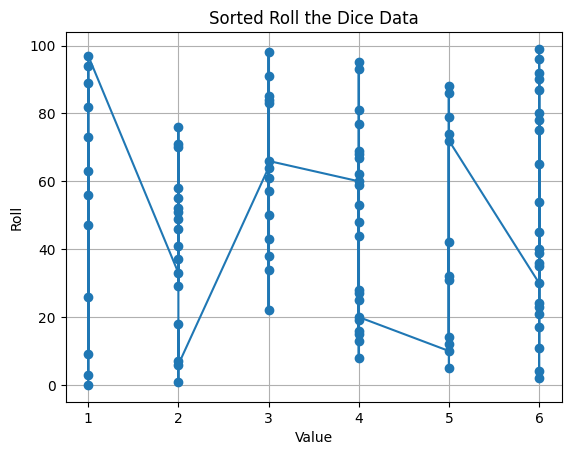

In [11]:
# Read the CSV file into a DataFrame
df = pd.read_csv('roll_the_dice_hundred.csv')

# Sort the values in ascending order
df_sorted = df.sort_values(by='value')

# Plot the values
plt.plot(df_sorted['value'], df_sorted['roll'], marker='o')
plt.xlabel('Value')
plt.ylabel('Roll')
plt.title('Sorted Roll the Dice Data')
plt.grid(True)
plt.show()

In [12]:
"""
This is a Frequency Representation: 
The height of each bar on the histogram represents the frequency or count of data points falling within the corresponding bin.
(Binning is the process of dividing the range of data values into smaller, equal-width intervals, and then counting the number of data points that fall into each interval). 
The higher the bar, the more data points are present in that particular interval.
"""

'\nThis is a Frequency Representation: \nThe height of each bar on the histogram represents the frequency or count of data points falling within the corresponding bin.\n(Binning is the process of dividing the range of data values into smaller, equal-width intervals, and then counting the number of data points that fall into each interval). \nThe higher the bar, the more data points are present in that particular interval.\n'

#### 2.- Using the functions you defined in *challenge 2*, calculate the mean value of the hundred dice rolls.

In [13]:
def simulate_dice_rolls(num_rolls):
    dice_outcomes = [random.randint(1, 6) for _ in range(num_rolls)]
    return dice_outcomes

def create_frequency_distribution(data):
    frequency_distribution = {}
    for value in data:
        frequency_distribution[value] = frequency_distribution.get(value, 0) + 1
    return frequency_distribution

# Simulate 100 dice rolls
num_rolls = 100
dice_rolls = simulate_dice_rolls(num_rolls)

# Create frequency distribution for the simulated dice rolls
frequency_distribution = create_frequency_distribution(dice_rolls)

print(frequency_distribution)


{4: 19, 3: 13, 1: 23, 6: 19, 5: 10, 2: 16}


#### 3.- Now, calculate the frequency distribution.


In [14]:
# Simulate 100 dice rolls
num_rolls = 100
dice_rolls = simulate_dice_rolls(num_rolls)


def calculate_frequency_distribution(data):
    frequency_distribution = {}
    for value in data:
        frequency_distribution[value] = frequency_distribution.get(value, 0) + 1
    return frequency_distribution

# Assuming you have the dice rolls data in the 'dice_rolls' list
frequency_distribution = calculate_frequency_distribution(dice_rolls)
print(frequency_distribution)


{1: 17, 4: 22, 2: 16, 6: 17, 3: 16, 5: 12}


#### 4.- Plot the histogram. What do you see (shape, values...) ? How can you connect the mean value to the histogram? 

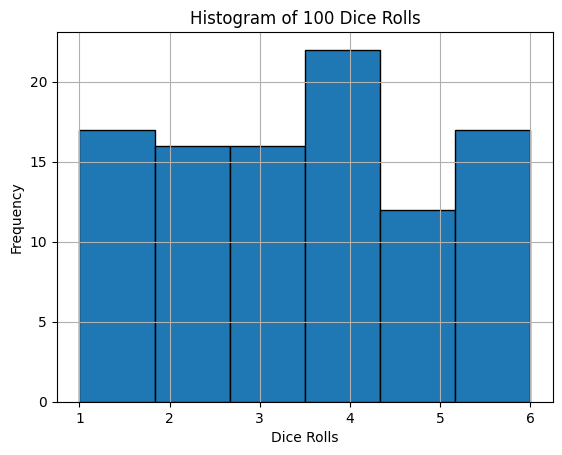

In [15]:
# Plot the histogram
plt.hist(dice_rolls, bins=6, edgecolor='black')
plt.xlabel('Dice Rolls')
plt.ylabel('Frequency')
plt.title('Histogram of 100 Dice Rolls')
plt.xticks(range(1, 7))  # Set the x-axis ticks to show all the outcomes (1 to 6)
plt.grid(True)
plt.show()

In [16]:
"""
Uniform shape, consistent values, and the mean's alignment.
With the expected center all indicate that the dice behaves as a fair and random generator, adhering to the principles of probability and randomness.
"""

"\nUniform shape, consistent values, and the mean's alignment.\nWith the expected center all indicate that the dice behaves as a fair and random generator, adhering to the principles of probability and randomness.\n"

#### 5.- Read the `roll_the_dice_thousand.csv` from the `data` folder. Plot the frequency distribution as you did before. Has anything changed? Why do you think it changed?

{1: 155, 3: 144, 4: 186, 6: 149, 2: 192, 5: 174}


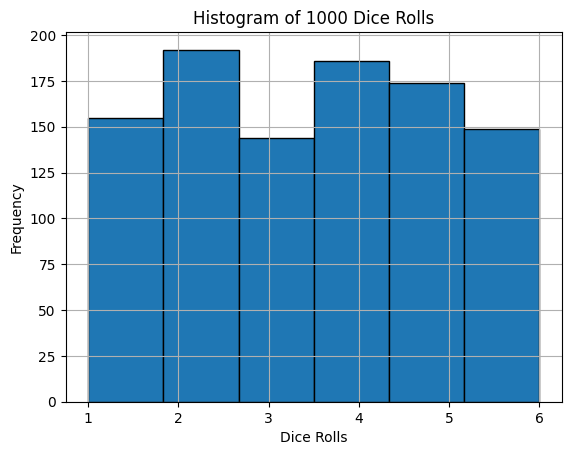

In [17]:
# Read the CSV file into a DataFrame
df = pd.read_csv('roll_the_dice_thousand.csv')

# Simulate 100 dice rolls
num_rolls = 1000
dice_rolls = simulate_dice_rolls(num_rolls)


def calculate_frequency_distribution(data):
    frequency_distribution = {}
    for value in data:
        frequency_distribution[value] = frequency_distribution.get(value, 0) + 1
    return frequency_distribution

# Assuming you have the dice rolls data in the 'dice_rolls' list
frequency_distribution = calculate_frequency_distribution(dice_rolls)
print(frequency_distribution)

# Plot the histogram
plt.hist(dice_rolls, bins=6, edgecolor='black')
plt.xlabel('Dice Rolls')
plt.ylabel('Frequency')
plt.title('Histogram of 1000 Dice Rolls')
plt.xticks(range(1, 7))  # Set the x-axis ticks to show all the outcomes (1 to 6)
plt.grid(True)
plt.show()

In [18]:
"""
Increase
"""

'\nIncrease\n'

## Challenge 4
In the `data` folder of this repository you will find three different files with the prefix `ages_population`. These files contain information about a poll answered by a thousand people regarding their age. Each file corresponds to the poll answers in different neighbourhoods of Barcelona.

#### 1.- Read the file `ages_population.csv`. Calculate the frequency distribution and plot it as we did during the lesson. Try to guess the range in which the mean and the standard deviation will be by looking at the plot. 

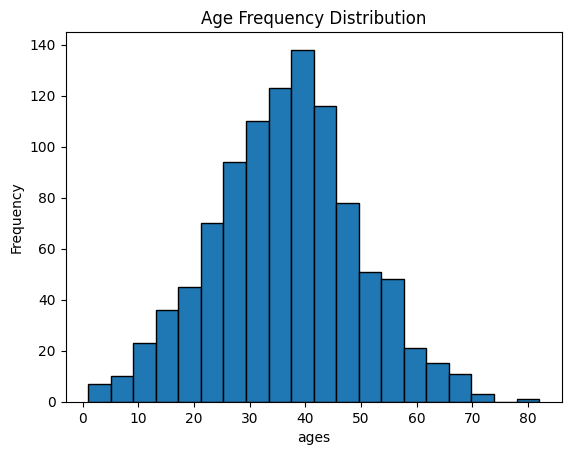

In [19]:
# Read the CSV file into a pandas DataFrame

df = pd.read_csv('ages_population.csv')

# Calculate the frequency distribution using the 'hist' method
# You can change the number of bins as per your preference
hist_data = df['observation'].hist(bins=20, edgecolor='black', grid=False)

# Set labels and title
plt.xlabel('ages')
plt.ylabel('Frequency')
plt.title('Age Frequency Distribution')

# Show the plot
plt.show()


#### 2.- Calculate the exact mean and standard deviation and compare them with your guesses. Do they fall inside the ranges you guessed?

In [20]:
# Calculate the mean and standard deviation of the 'age' column
mean_age = df['observation'].mean()
std_age = df['observation'].std()

print(f"Exact mean: {mean_age}")
print(f"Exact standard deviation: {std_age}")

Exact mean: 36.56
Exact standard deviation: 12.81649962597677


In [21]:
"""
The ages in the dataset are close to 36.56 years old. (from the exact mean)
Standard deviation is approximately 12.82, which tells us about the spread or dispersion of the data points around the AGE OF 36.56.
"""

'\nThe ages in the dataset are close to 36.56 years old. (from the exact mean)\nStandard deviation is approximately 12.82, which tells us about the spread or dispersion of the data points around the AGE OF 36.56.\n'

#### 3.- Now read the file `ages_population2.csv` . Calculate the frequency distribution and plot it.

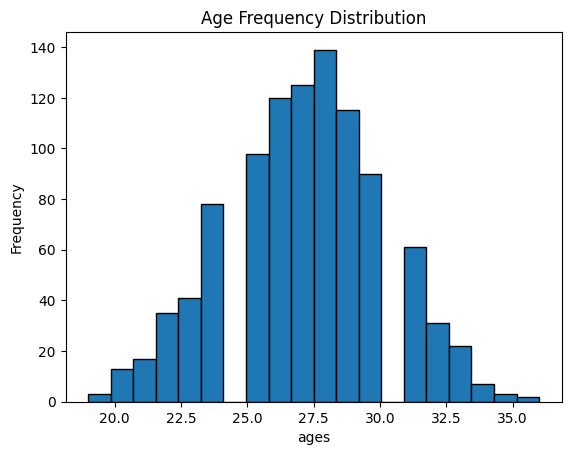

In [22]:
# Read the CSV file into a pandas DataFrame

df = pd.read_csv('ages_population2.csv')

# Calculate the frequency distribution using the 'hist' method
# You can change the number of bins as per your preference
hist_data = df['observation'].hist(bins=20, edgecolor='black', grid=False)

# Set labels and title
plt.xlabel('ages')
plt.ylabel('Frequency')
plt.title('Age Frequency Distribution')

# Show the plot
plt.show()


####  4.- What do you see? Is there any difference with the frequency distribution in step 1?

In [23]:
"""
A significant proportion of the population ages is between 25 and 30.
"""

'\nA significant proportion of the population ages is between 25 and 30.\n'

#### 5.- Calculate the mean and standard deviation. Compare the results with the mean and standard deviation in step 2. What do you think?

In [24]:
## Calculate the mean and standard deviation of the 'age' column
mean_age = df['observation'].mean()
std_age = df['observation'].std()

print(f"Exact mean: {mean_age}")
print(f"Exact standard deviation: {std_age}")

Exact mean: 27.155
Exact standard deviation: 2.9698139326891835


In [25]:
"""
A significant proportion of the population falls within one standard deviation of the mean (approximately 68% of the data).
Meaning that most of the ages are likely to be between 24.185 (27.155 - 2.97) and 30.125 (27.155 + 2.97) years.
"""

'\nA significant proportion of the population falls within one standard deviation of the mean (approximately 68% of the data).\nMeaning that most of the ages are likely to be between 24.185 (27.155 - 2.97) and 30.125 (27.155 + 2.97) years.\n'

## Challenge 5
Now is the turn of `ages_population3.csv`.

#### 1.- Read the file `ages_population3.csv`. Calculate the frequency distribution and plot it.

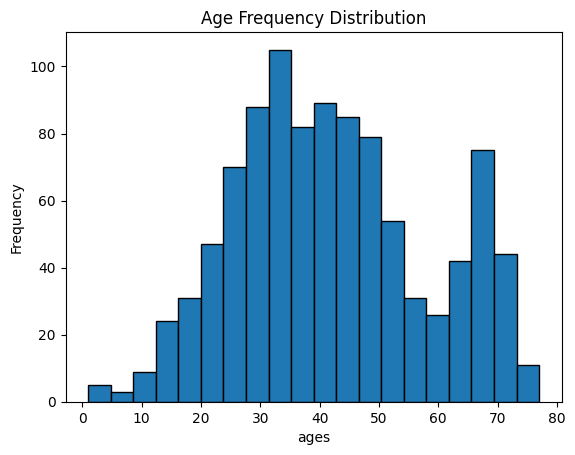

In [26]:
# Read the CSV file into a pandas DataFrame

df = pd.read_csv('ages_population3.csv')

# Calculate the frequency distribution using the 'hist' method
# You can change the number of bins as per your preference
hist_data = df['observation'].hist(bins=20, edgecolor='black', grid=False)

# Set labels and title
plt.xlabel('ages')
plt.ylabel('Frequency')
plt.title('Age Frequency Distribution')

# Show the plot
plt.show()

#### 2.- Calculate the mean and standard deviation. Compare the results with the plot in step 1. What is happening?

In [27]:
## Calculate the mean and standard deviation of the 'age' column
mean_age = df['observation'].mean()
std_age = df['observation'].std()

print(f"Exact mean: {mean_age}")
print(f"Exact standard deviation: {std_age}")

Exact mean: 41.989
Exact standard deviation: 16.14470595986593


In [28]:
"""
Around 68% of the population falls within one standard deviation of the mean.
Meaning most of the ages are likely to be between 25.845 (41.989 - 16.144) and 58.133 (41.989 + 16.144) years.
"""

'\nAround 68% of the population falls within one standard deviation of the mean.\nMeaning most of the ages are likely to be between 25.845 (41.989 - 16.144) and 58.133 (41.989 + 16.144) years.\n'

#### 3.- Calculate the four quartiles. Use the results to explain your reasoning for question in step 2. How much of a difference is there between the median and the mean?

In [29]:

# Read the CSV files into DataFrames
df1 = pd.read_csv('ages_population.csv')
df2 = pd.read_csv('ages_population2.csv')
df3 = pd.read_csv('ages_population3.csv')

# Function to calculate quartiles, median, and mean for a DataFrame
def calculate_statistics(df):
    # Calculate the quartiles
    q1 = np.percentile(df['observation'], 25)
    q2 = np.percentile(df['observation'], 50)  # This is the median
    q3 = np.percentile(df['observation'], 75)

    # Calculate the mean
    mean_age = np.mean(df['observation'])

    # Calculate the difference between the median and the mean
    difference = q2 - mean_age

    # Print the results
    print("Q1:", q1)
    print("Q2 (Median):", q2)
    print("Q3:", q3)
    print("Mean:", mean_age)
    print("Difference between Median and Mean:", difference)

# Call the function for each DataFrame
print("Statistics for ages_population.csv:")
calculate_statistics(df1)

print("\nStatistics for ages_population2.csv:")
calculate_statistics(df2)


Statistics for ages_population.csv:
Q1: 28.0
Q2 (Median): 37.0
Q3: 45.0
Mean: 36.56
Difference between Median and Mean: 0.4399999999999977

Statistics for ages_population2.csv:
Q1: 25.0
Q2 (Median): 27.0
Q3: 29.0
Mean: 27.155
Difference between Median and Mean: -0.15500000000000114


In [30]:
"""
    Skewness: The median (27.0) is less than the mean (27.155), indicating that the distribution is slightly positively skewed. 
    The tail of the distribution is skewed to the right (toward higher values).

    Spread: The IQR can be calculated as Q3 - Q1 = 29.0 - 25.0 = 4.0. 
    The IQR is relatively small, suggesting that the data is relatively concentrated around the median.
"""

'\n    Skewness: The median (27.0) is less than the mean (27.155), indicating that the distribution is slightly positively skewed. \n    The tail of the distribution is skewed to the right (toward higher values).\n\n    Spread: The IQR can be calculated as Q3 - Q1 = 29.0 - 25.0 = 4.0. \n    The IQR is relatively small, suggesting that the data is relatively concentrated around the median.\n'

#### 4.- Calculate other percentiles that might be useful to give more arguments to your reasoning.

In [32]:


# Read the CSV files into DataFrames
df1 = pd.read_csv('ages_population.csv')
df2 = pd.read_csv('ages_population2.csv')
df3 = pd.read_csv('ages_population3.csv')

# Function to calculate and print percentiles for a DataFrame
def calculate_percentiles(df):
    percentiles = [5, 10, 25, 50, 75, 90, 95]
    for p in percentiles:
        percentile_value = df['observation'].quantile(p / 100)
        print(f"{p}th percentile: {percentile_value}")

# Apply the function to each DataFrame
print("Percentiles for ages_population.csv:")
calculate_percentiles(df1)

print("\nPercentiles for ages_population2.csv:")
calculate_percentiles(df2)

print("\nPercentiles for ages_population3.csv:")
calculate_percentiles(df3)


Percentiles for ages_population.csv:
5th percentile: 14.950000000000003
10th percentile: 20.0
25th percentile: 28.0
50th percentile: 37.0
75th percentile: 45.0
90th percentile: 53.0
95th percentile: 58.0

Percentiles for ages_population2.csv:
5th percentile: 22.0
10th percentile: 23.0
25th percentile: 25.0
50th percentile: 27.0
75th percentile: 29.0
90th percentile: 31.0
95th percentile: 32.0

Percentiles for ages_population3.csv:
5th percentile: 17.0
10th percentile: 22.0
25th percentile: 30.0
50th percentile: 40.0
75th percentile: 53.0
90th percentile: 67.0
95th percentile: 70.0


In [ ]:
"""
1st csv :
 - Around 90% of the data falls below the age of 53 years, indicating that only a small proportion of the population is older than this age.
 - The median age is 37 years, indicating that half of the population is older than 37 years and half is younger.
 - (Q3) marks the upper boundary of the third quartile. 
 Approximately 75% of the data falls below the age of 45 years, suggesting that a majority of the population is younger than this age.

2d csv :
- Suggests that this population might be younger on average.

3rd csv :
- (50th percentile) is 40 years, suggesting that half of the population is older than 40 years and half is younger.
- 90th and 95th percentiles are 67.0 and 70.0, respectively, which indicates a significant proportion of older individuals in this population.

"""

'\nyour comments here\n'

## Bonus challenge
Compare the information about the three neighbourhoods. Prepare a report about the three of them. Remember to find out which are their similarities and their differences backing your arguments in basic statistics.

In [ ]:
# your code here

In [ ]:
"""
your comments here
"""

'\nyour comments here\n'